# Datasets inlezen

Hier doen we wat ervaring op met de Jupyter notebooks, en het ophalen en inlezen van datasets met `sklearn`.

In [1]:
import os
import numpy as np

from sklearn.datasets import fetch_mldata

import matplotlib.pyplot as plt
%matplotlib inline

# MNIST dataset

De onderstaande commando's halen de MNIST dataset op en doen wat kleine visualisaties.

In [3]:
mnist = fetch_mldata('MNIST original', data_home=os.getcwd())

In [4]:
mnist.data.shape

(70000, 784)

In [61]:
print(np.unique(mnist.target))
print(mnist.target)

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

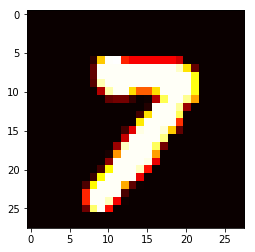

In [24]:
plt.imshow(mnist.data[45289].reshape(28, 28), cmap="hot", interpolation='nearest')

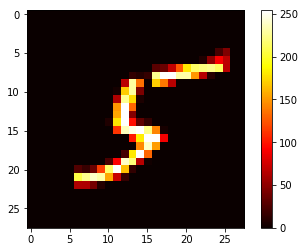

In [28]:
plt.imshow(mnist.data[35000].reshape(28, 28), cmap="hot", interpolation='nearest')
plt.colorbar()


# IRIS dataset

In [14]:
iris = fetch_mldata('iris', data_home=os.getcwd())

In [15]:
iris.data.shape

(150, 4)

In [16]:
np.unique(iris.target)

array([1, 2, 3], dtype=int64)

# 20 newsgroups

In [17]:
from sklearn.datasets import fetch_20newsgroups

In [18]:
newsgroups_train = fetch_20newsgroups(subset='train', data_home=os.getcwd())

In [29]:
newsgroups_test = fetch_20newsgroups(subset='test', data_home=os.getcwd())

### Beschrijving van de data
`newsgroups_train.data` is een lijst, bestaande uit tekst (idem voor `newsgroups_test.data`)

In [30]:
newsgroups_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [31]:
len(newsgroups_train.data)

11314

In [32]:
len(newsgroups_test.data)

7532

`target_names` is de tekstuele representatie van de klasse die in `target` staat

In [33]:
newsgroups_train.target_names, newsgroups_train.target

(['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 array([7, 4, 4, ..., 3, 1, 8]))

# Cross validation sets maken

Het is nu ook handig om alvast te oefenen met het maken van een training- en testset. Gebruik hiervoor de `train_test_split` functie van sklearn (uit `sklearn.model_selection`) en pas deze toe op een van de datasets die hierboven zijn ingeladen.

In [43]:
from sklearn.model_selection import train_test_split
#train_test_split op Newsgroup data
X_train, X_test, y_train, y_test = train_test_split(newsgroups_train.data, newsgroups_train.target, test_size=0.4, random_state=0)

print(len(X_train))
print(len(X_test))

print(0.4*(len(X_train)+len(X_test)))



6788
4526
4525.6


In [45]:
#train_test_split op MNIST
train, test = train_test_split(mnist.data, test_size=0.2)
train.shape, test.shape

((56000, 784), (14000, 784))

In [47]:
14000/70000

0.2

En maak nu een 5-fold cross-validatie set met `KFold`.

In [51]:
from sklearn.model_selection import KFold

kfold=KFold(n_splits=10)

In [56]:
#get the indices from the dataset for Kfold
for train, test in kfold.split(mnist.data):
    train
    break

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**We have the indices for the trainingset and testset. Make new matrices from the original dataset and target:**

In [62]:
X_train, X_test, y_train, y_test = mnist.data[train], mnist.data[test], mnist.target[train], mnist.target[test]

In [63]:
X_train.shape

(63000, 784)

In [64]:
y_train.shape

(63000,)